In [3]:
import time
import itertools
import pandas as pd
import numpy as np
from queue import Queue
from collections import deque
# from graphviz import Graph, Digraph
from heapq import heapify, heappush, heappop
from math import radians, sin, cos, acos, atan2

# Helper functions used in both problems

In [4]:
def simple_problem_solving_agent(seq, start_state, final_state, search, algo):
    if not seq:
        goal_test = formulate_goal()
        information = formulate_problem(algo)
        seq = search(start_state, final_state, goal_test, information)
        if seq is None:
            return None
    if isinstance(seq, list):  # for bdfs and Astar
        return seq
    if isinstance(final_state, np.ndarray):
        final_state = convert_to_string(final_state)
    seq = get_path(seq, final_state)
    return seq


def goal_test(current_state, final_state):
    return current_state == final_state


def formulate_goal():
    return goal_test


def formulate_problem(algo):
    if algo == "DFS":
        return [deque, "append", "pop"]
    elif algo == "BFS":
        return [Queue, "put", "get"]
    elif algo == "BiDFS_path" or algo == "AStar_path":
        return []
    elif algo == "AStar_puzzle":
        return ["consider path cost"]
    elif algo == "GBFS_puzzle":
        return ["no path cost"]


def get_path(parent: dict, final_state) -> list:
    path = []
    string = final_state
    if isinstance(parent[string], str):
        while parent[string] != string:
            path.append(string)
            string = parent[string]
        path.append(string)
    else:
        while parent[string][3] != string:
            path.append(string)
            string = parent[string][3]
        path.append(string)
    return path

# Problem 1 - Path finding

In [2]:
# Load dataset
df = pd.read_excel("Indian_capitals.xlsx", header=None)

# Fixing typos in dataset
for i in range(2, 6):
    df.loc[i, 0] = "Amaravati"
for i in range(48, 51):
    df.loc[i, 0] = "Shimla"

print(df)

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

###  The below straight line distances have been calculated using a script and a certain timeout to deal with LocationIQ timeouts.

In [4]:
straight_distance = {"Hyderabad": {"Itanagar": 1894.74, "Dispur": 1684.68, "Patna": 1144.29, "Raipur": 542.19, "Panaji": 536.87, "Gandhinagar": 887.55, "Chandigarh": 1492.2, "Shimla": 1530.64, "Srinagar": 1890.47, "Ranchi": 976.47, "Bangalore": 499.13, "Thiruvanathapuram": 996.92, "Bhopal": 661.46, "Mumbai": 618.82, "Imphal": 1802.69, "Shillong": 1658.72, "Aizawl": 1642.66, "Kohima": 1868.94, "Bhubaneswar": 840.14, "Jaipur": 1093.63, "Gangtok": 1518.85, "Chennai": 517.45, "Amaravati": 237.57, "Agartala": 1513.36, "Dehradun": 1439.13, "Lucknow": 1081.07, "Kolkata": 1182.27, "Hyderabad": 0}, "Itanagar": {"Hyderabad": 1894.74, "Dispur": 210.2, "Patna": 862.78, "Raipur": 1378.83, "Panaji": 2417.18, "Gandhinagar": 2151.73, "Chandigarh": 1687.87, "Shimla": 1657.56, "Srinagar": 1955.95, "Ranchi": 931.64, "Bangalore": 2290.77, "Thiruvanathapuram": 2706.97, "Bhopal": 1686.59, "Mumbai": 2308.67, "Imphal": 257.37, "Shillong": 242.37, "Aizawl": 384.08, "Kohima": 159.34, "Bhubaneswar": 1096.97, "Jaipur": 1762.41, "Gangtok": 496.2, "Chennai": 2087.01, "Amaravati": 1791.93, "Agartala": 432.63, "Dehradun": 1559.8, "Lucknow": 1257.34, "Kolkata": 732.78, "Itanagar": 0}, "Dispur": {"Hyderabad": 1684.68, "Itanagar": 210.2, "Patna": 669.91, "Raipur": 1169.25, "Panaji": 2207.06, "Gandhinagar": 1959.48, "Chandigarh": 1553.22, "Shimla": 1528.13, "Srinagar": 1851.52, "Ranchi": 722.5, "Bangalore": 2084.4, "Thiruvanathapuram": 2506.58, "Bhopal": 1488.77, "Mumbai": 2102.63, "Imphal": 262.41, "Shillong": 64.59, "Aizawl": 283.81, "Kohima": 241.44, "Bhubaneswar": 892.93, "Jaipur": 1590.27, "Gangtok": 341.95, "Chennai": 1885.88, "Amaravati": 1584.47, "Agartala": 263.07, "Dehradun": 1423.46, "Lucknow": 1082.99, "Kolkata": 529.66, "Dispur": 0}, "Patna": {"Hyderabad": 1144.29, "Itanagar": 862.78, "Dispur": 669.91, "Raipur": 602.46, "Panaji": 1625.19, "Gandhinagar": 1290.03, "Chandigarh": 996.6, "Shimla": 988.83, "Srinagar": 1367.24, "Ranchi": 249.83, "Bangalore": 1610.5, "Thiruvanathapuram": 2084.63, "Bhopal": 824.82, "Mumbai": 1464.7, "Imphal": 891.09, "Shillong": 677.77, "Aizawl": 795.11, "Kohima": 906.19, "Bhubaneswar": 598.62, "Jaipur": 938.76, "Gangtok": 396.41, "Chennai": 1482.35, "Amaravati": 1118.76, "Agartala": 652.65, "Dehradun": 870.53, "Lucknow": 439.59, "Kolkata": 470.59, "Patna": 0}, "Raipur": {"Hyderabad": 542.19, "Itanagar": 1378.83, "Dispur": 1169.25, "Patna": 602.46, "Panaji": 1041.57, "Gandhinagar": 950.55, "Chandigarh": 1160.8, "Shimla": 1183.66, "Srinagar": 1576.13, "Ranchi": 447.64, "Bangalore": 1013.65, "Thiruvanathapuram": 1497.67, "Bhopal": 490.26, "Mumbai": 953.53, "Imphal": 1319.33, "Shillong": 1151.17, "Aizawl": 1172.22, "Kohima": 1372.17, "Bhubaneswar": 450.85, "Jaipur": 863.98, "Gangtok": 978.87, "Chennai": 918.35, "Amaravati": 538.32, "Agartala": 1031.78, "Dehradun": 1072.31, "Lucknow": 626.74, "Kolkata": 708.2, "Raipur": 0}, "Panaji": {"Hyderabad": 536.87, "Itanagar": 2417.18, "Dispur": 2207.06, "Patna": 1625.19, "Raipur": 1041.57, "Gandhinagar": 867.74, "Chandigarh": 1718.63, "Shimla": 1768.16, "Srinagar": 2067.92, "Ranchi": 1488.51, "Bangalore": 492.92, "Thiruvanathapuram": 845.66, "Bhopal": 939.79, "Mumbai": 396.75, "Imphal": 2336.05, "Shillong": 2184.76, "Aizawl": 2177.68, "Kohima": 2399.22, "Bhubaneswar": 1376.95, "Jaipur": 1286.14, "Gangtok": 2014.61, "Chennai": 745.73, "Amaravati": 722.02, "Agartala": 2046.34, "Dehradun": 1703.77, "Lucknow": 1459.48, "Kolkata": 1715.17, "Panaji": 0}, "Gandhinagar": {"Hyderabad": 887.55, "Itanagar": 2151.73, "Dispur": 1959.48, "Patna": 1290.03, "Raipur": 950.55, "Panaji": 867.74, "Chandigarh": 927.72, "Shimla": 983.59, "Srinagar": 1224.98, "Ranchi": 1294.26, "Bangalore": 1252.76, "Thiruvanathapuram": 1696.27, "Bhopal": 485.01, "Mumbai": 476.81, "Imphal": 2167.17, "Shillong": 1963.35, "Aizawl": 2046.16, "Kohima": 2193.0, "Bhubaneswar": 1401.22, "Jaipur": 520.16, "Gangtok": 1667.27, "Chennai": 1385.81, "Amaravati": 1108.59, "Agartala": 1899.52, "Dehradun": 953.83, "Lucknow": 926.17, "Kolkata": 1608.93, "Gandhinagar": 0}, "Chandigarh": {"Hyderabad": 1492.2, "Itanagar": 1687.87, "Dispur": 1553.22, "Patna": 996.6, "Raipur": 1160.8, "Panaji": 1718.63, "Gandhinagar": 927.72, "Shimla": 57.73, "Srinagar": 415.33, "Ranchi": 1176.67, "Bangalore": 1974.45, "Thiruvanathapuram": 2466.17, "Bhopal": 832.57, "Mumbai": 1368.31, "Imphal": 1810.79, "Shillong": 1586.97, "Aizawl": 1755.57, "Kohima": 1789.75, "Bhubaneswar": 1475.48, "Jaipur": 432.78, "Gangtok": 1211.3, "Chennai": 1994.33, "Amaravati": 1624.1, "Agartala": 1624.36, "Dehradun": 130.1, "Lucknow": 592.7, "Kolkata": 1463.57, "Chandigarh": 0}, "Shimla": {"Hyderabad": 1530.64, "Itanagar": 1657.56, "Dispur": 1528.13, "Patna": 988.83, "Raipur": 1183.66, "Panaji": 1768.16, "Gandhinagar": 983.59, "Chandigarh": 57.73, "Srinagar": 396.96, "Ranchi": 1177.91, "Bangalore": 2015.87, "Thiruvanathapuram": 2508.95, "Bhopal": 873.28, "Mumbai": 1421.1, "Imphal": 1787.16, "Shillong": 1563.73, "Aizawl": 1736.92, "Kohima": 1763.0, "Bhubaneswar": 1484.37, "Jaipur": 483.83, "Gangtok": 1186.29, "Chennai": 2029.36, "Amaravati": 1656.71, "Agartala": 1607.95, "Dehradun": 120.23, "Lucknow": 599.12, "Kolkata": 1458.05, "Shimla": 0}, "Srinagar": {"Hyderabad": 1890.47, "Itanagar": 1955.95, "Dispur": 1851.52, "Patna": 1367.24, "Raipur": 1576.13, "Panaji": 2067.92, "Gandhinagar": 1224.98, "Chandigarh": 415.33, "Shimla": 396.96, "Ranchi": 1568.31, "Bangalore": 2362.38, "Thiruvanathapuram": 2847.69, "Bhopal": 1229.13, "Mumbai": 1694.48, "Imphal": 2113.78, "Shillong": 1894.0, "Aizawl": 2081.99, "Kohima": 2076.84, "Bhubaneswar": 1880.26, "Jaipur": 801.73, "Gangtok": 1514.95, "Chennai": 2398.82, "Amaravati": 2033.07, "Agartala": 1961.01, "Dehradun": 515.46, "Lucknow": 994.96, "Kolkata": 1837.81, "Srinagar": 0}, "Ranchi": {"Hyderabad": 976.47, "Itanagar": 931.64, "Dispur": 722.5, "Patna": 249.83, "Raipur": 447.64, "Panaji": 1488.51, "Gandhinagar": 1294.26, "Chandigarh": 1176.67, "Shimla": 1177.91, "Srinagar": 1568.31, "Bangalore": 1414.23, "Thiruvanathapuram": 1873.74, "Bhopal": 809.67, "Mumbai": 1385.01, "Imphal": 888.42, "Shillong": 707.41, "Aizawl": 754.91, "Kohima": 932.29, "Bhubaneswar": 349.19, "Jaipur": 1034.39, "Gangtok": 550.31, "Chennai": 1261.59, "Amaravati": 913.56, "Agartala": 609.14, "Dehradun": 1057.7, "Lucknow": 586.54, "Kolkata": 322.04, "Ranchi": 0}, "Bangalore": {"Hyderabad": 499.13, "Itanagar": 2290.77, "Dispur": 2084.4, "Patna": 1610.5, "Raipur": 1013.65, "Panaji": 492.92, "Gandhinagar": 1252.76, "Chandigarh": 1974.45, "Shimla": 2015.87, "Srinagar": 2362.38, "Ranchi": 1414.23, "Thiruvanathapuram": 498.08, "Bhopal": 1142.6, "Mumbai": 835.09, "Imphal": 2160.75, "Shillong": 2048.99, "Aizawl": 1992.51, "Kohima": 2240.66, "Bhubaneswar": 1195.13, "Jaipur": 1560.67, "Gangtok": 1964.52, "Chennai": 291.9, "Amaravati": 502.55, "Agartala": 1879.74, "Dehradun": 1929.4, "Lucknow": 1579.93, "Kolkata": 1558.75, "Bangalore": 0}, "Thiruvanathapuram": {"Hyderabad": 996.92, "Itanagar": 2706.97, "Dispur": 2506.58, "Patna": 2084.63, "Raipur": 1497.67, "Panaji": 845.66, "Gandhinagar": 1696.27, "Chandigarh": 2466.17, "Shimla": 2508.95, "Srinagar": 2847.69, "Ranchi": 1873.74, "Bangalore": 498.08, "Bhopal": 1636.49, "Mumbai": 1239.14, "Imphal": 2550.5, "Shillong": 2464.88, "Aizawl": 2380.06, "Kohima": 2639.2, "Bhubaneswar": 1615.3, "Jaipur": 2046.77, "Gangtok": 2421.3, "Chennai": 620.96, "Amaravati": 965.92, "Agartala": 2282.09, "Dehradun": 2424.86, "Lucknow": 2076.91, "Kolkata": 1976.96, "Thiruvanathapuram": 0}, "Bhopal": {"Hyderabad": 661.46, "Itanagar": 1686.59, "Dispur": 1488.77, "Patna": 824.82, "Raipur": 490.26, "Panaji": 939.79, "Gandhinagar": 485.01, "Chandigarh": 832.57, "Shimla": 873.28, "Srinagar": 1229.13, "Ranchi": 809.67, "Bangalore": 1142.6, "Thiruvanathapuram": 1636.49, "Mumbai": 673.69, "Imphal": 1687.63, "Shillong": 1488.51, "Aizawl": 1562.92, "Kohima": 1718.18, "Bhubaneswar": 933.19, "Jaipur": 437.13, "Gangtok": 1214.62, "Chennai": 1171.46, "Amaravati": 816.22, "Agartala": 1416.44, "Dehradun": 789.04, "Lucknow": 534.69, "Kolkata": 1123.99, "Bhopal": 0}, "Mumbai": {"Hyderabad": 618.82, "Itanagar": 2308.67, "Dispur": 2102.63, "Patna": 1464.7, "Raipur": 953.53, "Panaji": 396.75, "Gandhinagar": 476.81, "Chandigarh": 1368.31, "Shimla": 1421.1, "Srinagar": 1694.48, "Ranchi": 1385.01, "Bangalore": 835.09, "Thiruvanathapuram": 1239.14, "Bhopal": 673.69, "Imphal": 2269.99, "Shillong": 2091.72, "Aizawl": 2125.49, "Kohima": 2317.3, "Bhubaneswar": 1370.22, "Jaipur": 938.12, "Gangtok": 1860.97, "Chennai": 1028.31, "Amaravati": 855.2, "Agartala": 1984.08, "Dehradun": 1370.68, "Lucknow": 1207.5, "Kolkata": 1661.7, "Mumbai": 0}, "Imphal": {"Hyderabad": 1802.69, "Itanagar": 257.37, "Dispur": 262.41, "Patna": 891.09, "Raipur": 1319.33, "Panaji": 2336.05, "Gandhinagar": 2167.17, "Chandigarh": 1810.79, "Shimla": 1787.16, "Srinagar": 2113.78, "Ranchi": 888.42, "Bangalore": 2160.75, "Thiruvanathapuram": 2550.5, "Bhopal": 1687.63, "Mumbai": 2269.99, "Shillong": 223.98, "Aizawl": 170.49, "Kohima": 108.06, "Bhubaneswar": 971.81, "Jaipur": 1826.37, "Gangtok": 601.51, "Chennai": 1936.41, "Amaravati": 1672.4, "Agartala": 289.78, "Dehradun": 1680.79, "Lucknow": 1320.4, "Kolkata": 620.88, "Imphal": 0}, "Shillong": {"Hyderabad": 1658.72, "Itanagar": 242.37, "Dispur": 64.59, "Patna": 677.77, "Raipur": 1151.17, "Panaji": 2184.76, "Gandhinagar": 1963.35, "Chandigarh": 1586.97, "Shimla": 1563.73, "Srinagar": 1894.0, "Ranchi": 707.41, "Bangalore": 2048.99, "Thiruvanathapuram": 2464.88, "Bhopal": 1488.51, "Mumbai": 2091.72, "Imphal": 223.98, "Aizawl": 220.89, "Kohima": 229.74, "Bhubaneswar": 854.74, "Jaipur": 1607.73, "Gangtok": 379.43, "Chennai": 1844.78, "Amaravati": 1550.87, "Agartala": 203.26, "Dehradun": 1456.95, "Lucknow": 1100.83, "Kolkata": 490.55, "Shillong": 0}, "Aizawl": {"Hyderabad": 1642.66, "Itanagar": 384.08, "Dispur": 283.81, "Patna": 795.11, "Raipur": 1172.22, "Panaji": 2177.68, "Gandhinagar": 2046.16, "Chandigarh": 1755.57, "Shimla": 1736.92, "Srinagar": 2081.99, "Ranchi": 754.91, "Bangalore": 1992.51, "Thiruvanathapuram": 2380.06, "Bhopal": 1562.92, "Mumbai": 2125.49, "Imphal": 170.49, "Shillong": 220.89, "Kohima": 266.82, "Bhubaneswar": 807.27, "Jaipur": 1733.43, "Gangtok": 573.56, "Chennai": 1766.3, "Amaravati": 1506.46, "Agartala": 146.71, "Dehradun": 1625.66, "Lucknow": 1233.39, "Kolkata": 465.75, "Aizawl": 0}, "Kohima": {"Hyderabad": 1868.94, "Itanagar": 159.34, "Dispur": 241.44, "Patna": 906.19, "Raipur": 1372.17, "Panaji": 2399.22, "Gandhinagar": 2193.0, "Chandigarh": 1789.75, "Shimla": 1763.0, "Srinagar": 2076.84, "Ranchi": 932.29, "Bangalore": 2240.66, "Thiruvanathapuram": 2639.2, "Bhopal": 1718.18, "Mumbai": 2317.3, "Imphal": 108.06, "Shillong": 229.74, "Aizawl": 266.82, "Bhubaneswar": 1047.07, "Jaipur": 1831.32, "Gangtok": 579.7, "Chennai": 2022.73, "Amaravati": 1748.03, "Agartala": 360.94, "Dehradun": 1660.32, "Lucknow": 1324.03, "Kolkata": 688.16, "Kohima": 0}, "Bhubaneswar": {"Hyderabad": 840.14, "Itanagar": 1096.97, "Dispur": 892.93, "Patna": 598.62, "Raipur": 450.85, "Panaji": 1376.95, "Gandhinagar": 1401.22, "Chandigarh": 1475.48, "Shimla": 1484.37, "Srinagar": 1880.26, "Ranchi": 349.19, "Bangalore": 1195.13, "Thiruvanathapuram": 1615.3, "Bhopal": 933.19, "Mumbai": 1370.22, "Imphal": 971.81, "Shillong": 854.74, "Aizawl": 807.27, "Kohima": 1047.07, "Jaipur": 1260.01, "Gangtok": 834.19, "Chennai": 994.34, "Amaravati": 701.11, "Agartala": 686.38, "Dehradun": 1364.95, "Lucknow": 885.35, "Kolkata": 364.19, "Bhubaneswar": 0}, "Jaipur": {"Hyderabad": 1093.63, "Itanagar": 1762.41, "Dispur": 1590.27, "Patna": 938.76, "Raipur": 863.98, "Panaji": 1286.14, "Gandhinagar": 520.16, "Chandigarh": 432.78, "Shimla": 483.83, "Srinagar": 801.73, "Ranchi": 1034.39, "Bangalore": 1560.67, "Thiruvanathapuram": 2046.77, "Bhopal": 437.13, "Mumbai": 938.12, "Imphal": 1826.37, "Shillong": 1607.73, "Aizawl": 1733.43, "Kohima": 1831.32, "Bhubaneswar": 1260.01, "Gangtok": 1266.26, "Chennai": 1607.17, "Amaravati": 1252.96, "Agartala": 1589.71, "Dehradun": 436.79, "Lucknow": 507.29, "Kolkata": 1353.47, "Jaipur": 0}, "Gangtok": {"Hyderabad": 1518.85, "Itanagar": 496.2, "Dispur": 341.95, "Patna": 396.41, "Raipur": 978.87, "Panaji": 2014.61, "Gandhinagar": 1667.27, "Chandigarh": 1211.3, "Shimla": 1186.29, "Srinagar": 1514.95, "Ranchi": 550.31, "Bangalore": 1964.52, "Thiruvanathapuram": 2421.3, "Bhopal": 1214.62, "Mumbai": 1860.97, "Imphal": 601.51, "Shillong": 379.43, "Aizawl": 573.56, "Kohima": 579.7, "Bhubaneswar": 834.19, "Jaipur": 1266.26, "Chennai": 1805.55, "Amaravati": 1463.69, "Agartala": 472.18, "Dehradun": 1081.58, "Lucknow": 761.94, "Kolkata": 530.1, "Gangtok": 0}, "Chennai": {"Hyderabad": 517.45, "Itanagar": 2087.01, "Dispur": 1885.88, "Patna": 1482.35, "Raipur": 918.35, "Panaji": 745.73, "Gandhinagar": 1385.81, "Chandigarh": 1994.33, "Shimla": 2029.36, "Srinagar": 2398.82, "Ranchi": 1261.59, "Bangalore": 291.9, "Thiruvanathapuram": 620.96, "Bhopal": 1171.46, "Mumbai": 1028.31, "Imphal": 1936.41, "Shillong": 1844.78, "Aizawl": 1766.3, "Kohima": 2022.73, "Bhubaneswar": 994.34, "Jaipur": 1607.17, "Gangtok": 1805.55, "Amaravati": 382.86, "Agartala": 1664.1, "Dehradun": 1931.36, "Lucknow": 1531.32, "Kolkata": 1356.22, "Chennai": 0}, "Amaravati": {"Hyderabad": 237.57, "Itanagar": 1791.93, "Dispur": 1584.47, "Patna": 1118.76, "Raipur": 538.32, "Panaji": 722.02, "Gandhinagar": 1108.59, "Chandigarh": 1624.1, "Shimla": 1656.71, "Srinagar": 2033.07, "Ranchi": 913.56, "Bangalore": 502.55, "Thiruvanathapuram": 965.92, "Bhopal": 816.22, "Mumbai": 855.2, "Imphal": 1672.4, "Shillong": 1550.87, "Aizawl": 1506.46, "Kohima": 1748.03, "Bhubaneswar": 701.11, "Jaipur": 1252.96, "Gangtok": 1463.69, "Chennai": 382.86, "Agartala": 1387.47, "Dehradun": 1555.63, "Lucknow": 1148.54, "Kolkata": 1062.03, "Amaravati": 0}, "Agartala": {"Hyderabad": 1513.36, "Itanagar": 432.63, "Dispur": 263.07, "Patna": 652.65, "Raipur": 1031.78, "Panaji": 2046.34, "Gandhinagar": 1899.52, "Chandigarh": 1624.36, "Shimla": 1607.95, "Srinagar": 1961.01, "Ranchi": 609.14, "Bangalore": 1879.74, "Thiruvanathapuram": 2282.09, "Bhopal": 1416.44, "Mumbai": 1984.08, "Imphal": 289.78, "Shillong": 203.26, "Aizawl": 146.71, "Kohima": 360.94, "Bhubaneswar": 686.38, "Jaipur": 1589.71, "Gangtok": 472.18, "Chennai": 1664.1, "Amaravati": 1387.47, "Dehradun": 1494.85, "Lucknow": 1091.95, "Kolkata": 331.21, "Agartala": 0}, "Dehradun": {"Hyderabad": 1439.13, "Itanagar": 1559.8, "Dispur": 1423.46, "Patna": 870.53, "Raipur": 1072.31, "Panaji": 1703.77, "Gandhinagar": 953.83, "Chandigarh": 130.1, "Shimla": 120.23, "Srinagar": 515.46, "Ranchi": 1057.7, "Bangalore": 1929.4, "Thiruvanathapuram": 2424.86, "Bhopal": 789.04, "Mumbai": 1370.68, "Imphal": 1680.79, "Shillong": 1456.95, "Aizawl": 1625.66, "Kohima": 1660.32, "Bhubaneswar": 1364.95, "Jaipur": 436.79, "Gangtok": 1081.58, "Chennai": 1931.36, "Amaravati": 1555.63, "Agartala": 1494.85, "Lucknow": 479.6, "Kolkata": 1339.07, "Dehradun": 0}, "Lucknow": {"Hyderabad": 1081.07, "Itanagar": 1257.34, "Dispur": 1082.99, "Patna": 439.59, "Raipur": 626.74, "Panaji": 1459.48, "Gandhinagar": 926.17, "Chandigarh": 592.7, "Shimla": 599.12, "Srinagar": 994.96, "Ranchi": 586.54, "Bangalore": 1579.93, "Thiruvanathapuram": 2076.91, "Bhopal": 534.69, "Mumbai": 1207.5, "Imphal": 1320.4, "Shillong": 1100.83, "Aizawl": 1233.39, "Kohima": 1324.03, "Bhubaneswar": 885.35, "Jaipur": 507.29, "Gangtok": 761.94, "Chennai": 1531.32, "Amaravati": 1148.54, "Agartala": 1091.95, "Dehradun": 479.6, "Kolkata": 886.4, "Lucknow": 0}, "Kolkata": {"Hyderabad": 1182.27, "Itanagar": 732.78, "Dispur": 529.66, "Patna": 470.59, "Raipur": 708.2, "Panaji": 1715.17, "Gandhinagar": 1608.93, "Chandigarh": 1463.57, "Shimla": 1458.05, "Srinagar": 1837.81, "Ranchi": 322.04, "Bangalore": 1558.75, "Thiruvanathapuram": 1976.96, "Bhopal": 1123.99, "Mumbai": 1661.7, "Imphal": 620.88, "Shillong": 490.55, "Aizawl": 465.75, "Kohima": 688.16, "Bhubaneswar": 364.19, "Jaipur": 1353.47, "Gangtok": 530.1, "Chennai": 1356.22, "Amaravati": 1062.03, "Agartala": 331.21, "Dehradun": 1339.07, "Lucknow": 886.4, "Kolkata": 0}}

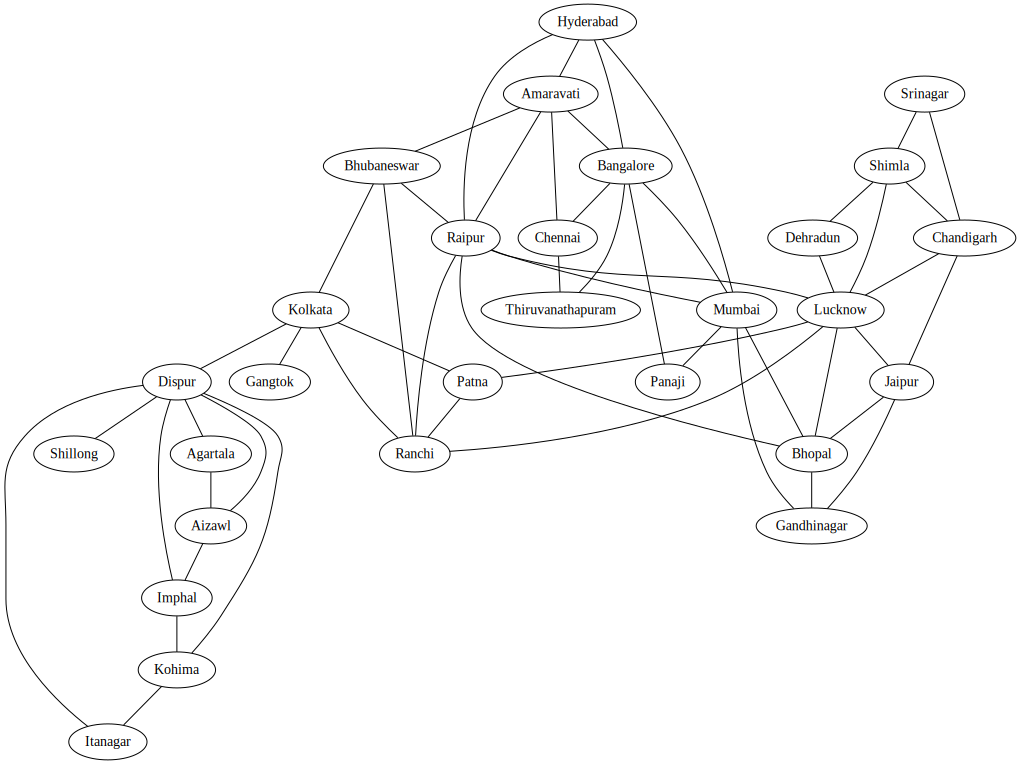

In [5]:
# Constructing Graph

rows = df.shape[0]
graph = dict()

dot = Graph(strict=True)
for _, edge in df.iterrows():
    if edge[0] not in graph:
        graph[edge[0]] = dict()
    if edge[1] not in graph:
        graph[edge[1]] = dict()
    graph[edge[0]][edge[1]] = edge[2]
    graph[edge[1]][edge[0]] = edge[2]
    dot.edge(edge[0], edge[1])
dot

In [6]:
# Take input

start_state = input("Enter source city: ")
final_state = input("Enter dest city: ")
if start_state not in graph or final_state not in graph:
    raise ValueError("Cities do not exist. Re enter correct input")

Enter source city: Itanagar
Enter dest city: Srinagar


In [7]:
# Helper functions
goal_test_ = lambda current_state, dest: current_state == dest
explore = lambda current_state: graph[current_state]


def print_path(path: list, algo: str, src: str, dest: str, dot):
    print(f"Total number of steps taken by {algo}: {len(path)}")
    print(f"Printing the transition cities from {src} to {dest} ------------>")
    
    trace = dot.copy()
    for i in range(len(path)-1):
        trace.node(path[i], _attributes={"color": "lightblue", "style": "filled"})
        trace.edge(path[i], path[i+1], _attributes={"color": "red"})

    trace.node(path[-1], _attributes={"color": "lightblue", "style": "filled"})
    return trace

In [8]:
def DFS_or_BFS(start_city: str, final_city: str, goal_test, information):
    data_structure, add, delete = information
    data_structure = data_structure()
    add = getattr(data_structure, add)
    delete = getattr(data_structure, delete)
    parent = dict()
    parent[start_city] = start_city
    
    add(start_city)

    while data_structure:
        current_city = delete()
        
        if goal_test(current_city, final_city):
            return parent
        
        neighbours = explore(current_city)
        for neighbour, _ in neighbours.items():
            if neighbour not in parent:
                add(neighbour)
                parent[neighbour] = current_city

In [9]:
def BiDirectional_Search(start_city: str, final_city: str, goal_test, information):
    src_queue = Queue()
    src_queue.put(start_city)
    src_parent = dict()
    src_parent[start_city] = start_city
    
    dest_queue = Queue()
    dest_queue.put(final_city)
    dest_parent = dict()
    dest_parent[final_city] = final_city

    if start_city in dest_parent:
         return [start_city]
    
    while src_queue or dest_queue:
        current_head = src_queue.get()
        current_bottom = dest_queue.get()
        
        # Explore from top
        neighbours = explore(current_head)
        for neighbour, _ in neighbours.items():
            if neighbour not in src_parent:
                src_queue.put(neighbour)
                src_parent[neighbour] = current_head
                if neighbour in dest_parent:
                    return [neighbour, src_parent, dest_parent]
        
        # Explore from bottom
        neighbours = explore(current_bottom)
        for neighbour, _ in neighbours.items():
            if neighbour not in dest_parent:
                dest_queue.put(neighbour)
                dest_parent[neighbour] = current_bottom
                if neighbour in src_parent:
                    return [neighbour, src_parent, dest_parent]


In [10]:
def AStar(start_city: str, final_city: str, goal_test, information):
    start_entry = [straight_distance[start_city][final_city], 0, start_city, start_city]
    parent = dict()
    parent[start_city] = start_entry
    
    frontier = list()
    heappush(frontier, start_entry.copy())

    while frontier:
        current_state = heappop(frontier)
        g_n = current_state[1]
        current_city = current_state[2]
        
        if goal_test(current_city, final_city):
            print(f"Path cost from {start_city} to {final_city}: {parent[final_city][0]} kms.")
            return parent
        
        neighbours = []
        unchecked_neighbours = explore(current_city)
        for neighbour, distance in unchecked_neighbours.items():
            try:
                dist = straight_distance[neighbour][final_city]
            except:
                pass
            else:
                dist = 0
            neighbours.append([dist+g_n+distance, g_n+distance, 
                               neighbour, current_city])

        for neighbour in neighbours:
            if neighbour[2] not in parent:
                heappush(frontier, neighbour)
                parent[neighbour[2]] = neighbour
            elif neighbour[0] < parent[neighbour[2]][0] and parent[neighbour[2]] in frontier:  # Already present in the parent and not fully explored
                index = frontier.index(parent[neighbour[2]])
                frontier[index] = neighbour
                heapify(frontier)

# DFS

Total time taken by DFS: 0.00031640499999952 seconds.
Total number of steps taken by DFS: 7
Printing the transition cities from Itanagar to Srinagar ------------>


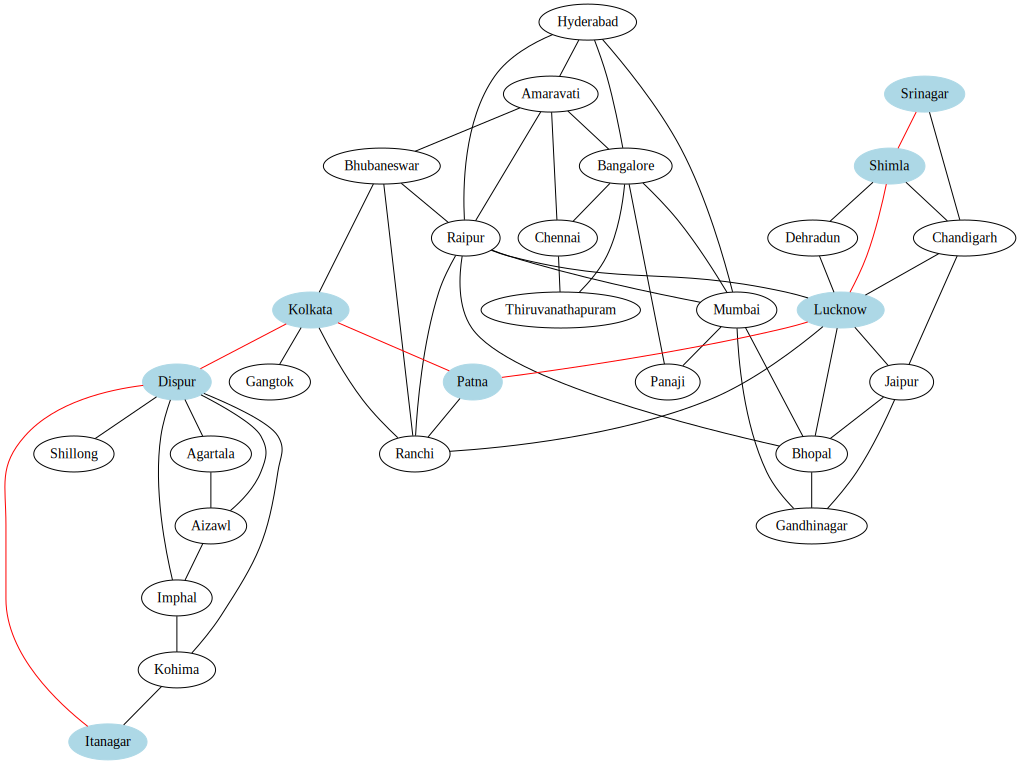

In [11]:
t1 = time.perf_counter()
path = simple_problem_solving_agent(list(), start_state, final_state, DFS_or_BFS, "DFS")
t2 = time.perf_counter()
print(f"Total time taken by DFS: {t2-t1} seconds.")

print_path(list(reversed(path)), "DFS", start_state, final_state, dot)

# BFS

Total time taken by BFS: 0.0005449820000009709 seconds.
Total number of steps taken by BFS: 7
Printing the transition cities from Itanagar to Srinagar ------------>


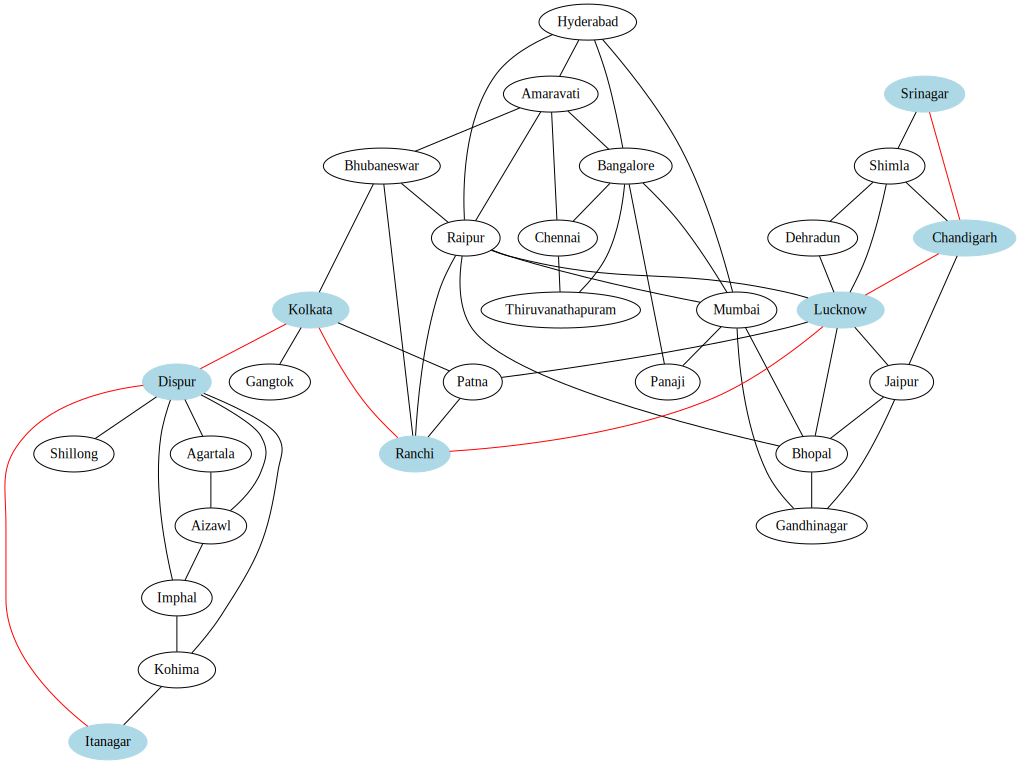

In [12]:
t1 = time.perf_counter()
path = simple_problem_solving_agent(list(), start_state, final_state, DFS_or_BFS, "BFS")
t2 = time.perf_counter()
print(f"Total time taken by BFS: {t2-t1} seconds.")

print_path(list(reversed(path)), "BFS", start_state, final_state, dot)

# BDFS

Total time taken by BiDirectional_Search: 0.0004527620000018828 seconds.
Total number of steps taken by BiDirectional_Search: 7
Printing the transition cities from Itanagar to Srinagar ------------>


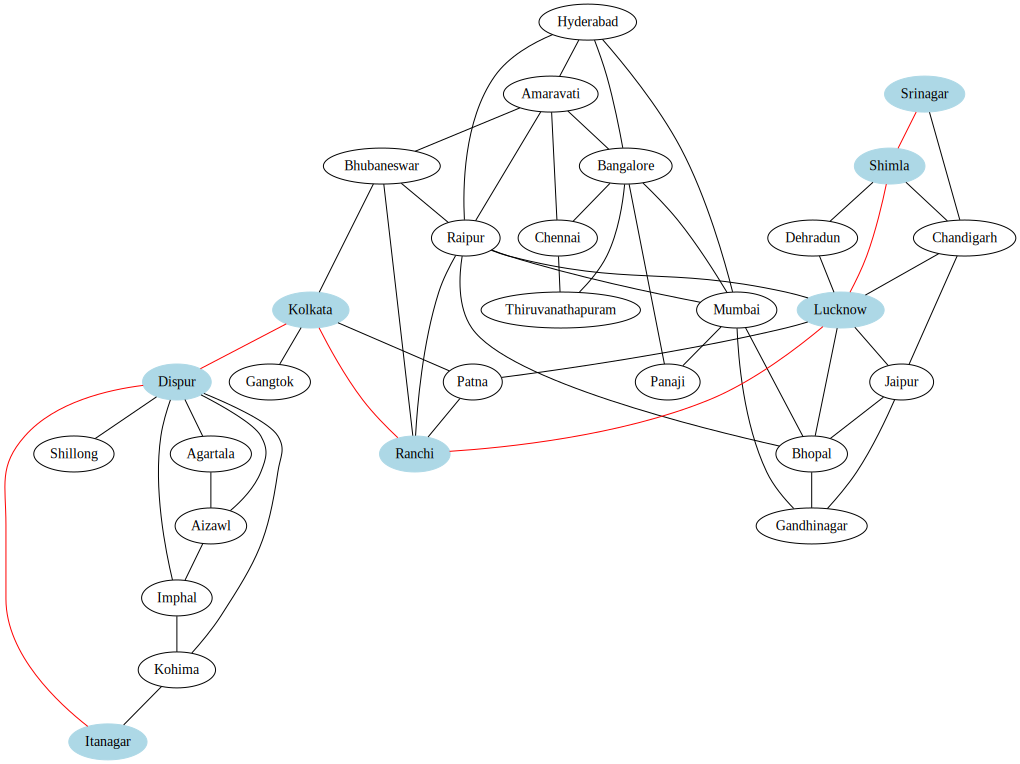

In [13]:
t1 = time.perf_counter()
joint, src_parent, dest_parent = simple_problem_solving_agent(list(), start_state, final_state, BiDirectional_Search, "BiDFS_path")
t2 = time.perf_counter()
print(f"Total time taken by BiDirectional_Search: {t2-t1} seconds.")


path = []
path = list(reversed(get_path(src_parent, joint)))
path.extend(get_path(dest_parent, joint)[1:])
print_path(path, "BiDirectional_Search", start_state, final_state, dot)

# AStar

Path cost from Itanagar to Srinagar: 3767 kms.
Total time taken by AStar: 0.0013542949999987286 seconds.
Total number of steps taken by AStar: 7
Printing the transition cities from Itanagar to Srinagar ------------>


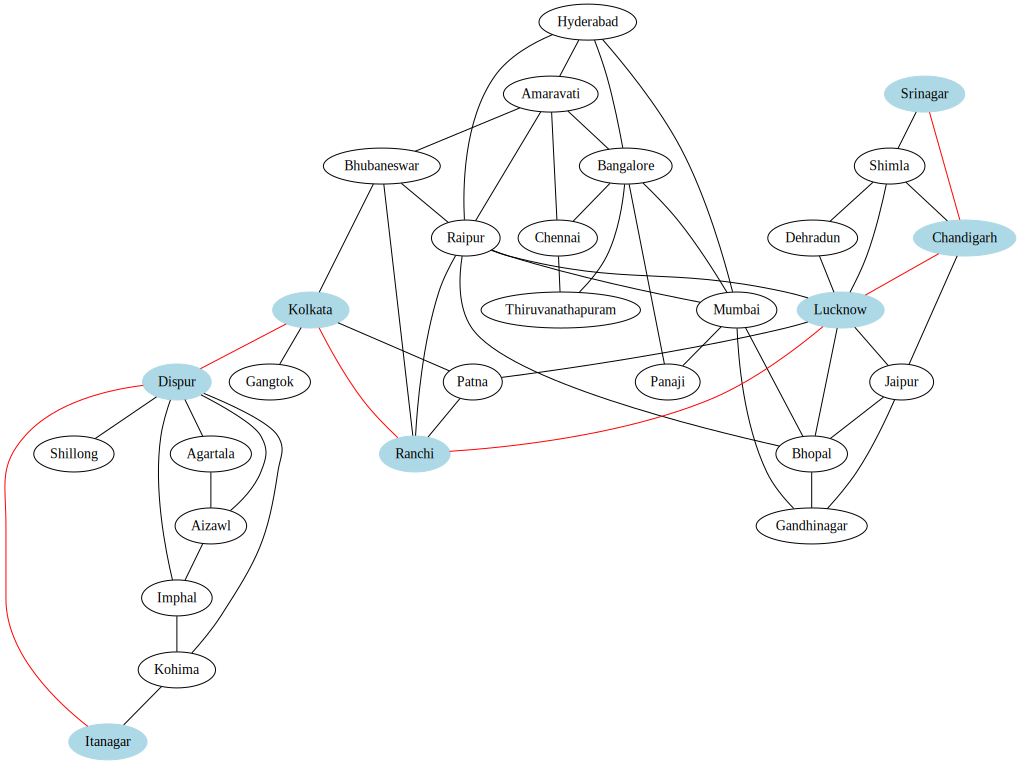

In [14]:
t1 = time.perf_counter()
path = simple_problem_solving_agent(list(), start_state, final_state, AStar, "AStar_path")
t2 = time.perf_counter()
print(f"Total time taken by AStar: {t2-t1} seconds.")

print_path(list(reversed(path)), "AStar", start_state, final_state, dot)

# Problem 2 - 8 Puzzle

In [5]:
# Take input

def take_input() -> list:
    err_msg = "Again call take_input function."
    space = list()
    already_present = set()
    for i in range(3):
        row = list(map(int, input(f"Enter {i+1}th row: ").split()))
        
        if len(row) != 3:
            raise ValueError("Length of row must be three. " + err_msg)
            
        for num in row:
            if num < 0 or num > 8:
                raise ValueError(f"Invalid number {num}. Enter number between 0 and 8. " + err_msg)
            if num in already_present: # Constant time lookup in set
                raise ValueError(f"Wrong input format. {num} already present. " + err_msg)
            else:
                already_present.add(num)
        space.append(row)

    return space

start_state = take_input()

Enter 1th row: 7 2 1
Enter 2th row: 3 0 5
Enter 3th row: 4 6 8


In [6]:
convert_to_string = lambda l: " ".join(map(str, l))
convert_to_np = lambda s: np.array(list(map(int, s.split())))


def explore_puzzle(current_state: np.ndarray) -> list:
    neighbours = []
    current_index = int(np.where(current_state == 0)[0])
    if current_index < 6: # Zero down
        neighbour = current_state.copy()
        neighbour[current_index] = neighbour[current_index+3]
        neighbour[current_index+3] = 0
        neighbours.append(neighbour)

    if current_index > 2: # Zero up
        neighbour = current_state.copy()
        neighbour[current_index] = neighbour[current_index-3]
        neighbour[current_index-3] = 0
        neighbours.append(neighbour)

    if current_index not in [2, 5, 8]: # Zero right
        neighbour = current_state.copy()
        neighbour[current_index] = neighbour[current_index+1]
        neighbour[current_index+1] = 0
        neighbours.append(neighbour)

    if current_index not in [0, 3, 6]: # Zero left
        neighbour = current_state.copy()
        neighbour[current_index] = neighbour[current_index-1]
        neighbour[current_index-1] = 0
        neighbours.append(neighbour)
    
    return neighbours


def print_path_puzzle(path: list, algo: str):
    print(f"Total number of steps taken by {algo}: {len(path)}")
    print("Printing the transition states from start to final ------------>")
    for string in reversed(path):
        l = convert_to_np(string)
        print(np.array([l[:3], l[3:6], l[6:]]))
        print()

        
def manhattan_distance(current_state: np.ndarray) -> int:
    h = 0
    for index, value in enumerate(current_state):
        current_x, current_y = index//3, index%3
        actual_x, actual_y = value//3, value%3
        h += (abs(actual_x-current_x) + abs(actual_y-current_y))
    return h


def check_solvability(arr: np.ndarray) -> bool:
    inv_count = 0
    for i in range(len(arr)):
        for j in range(i+1, len(arr)):
            if (arr[j] and arr[i] and arr[i] > arr[j]):
                inv_count += 1
    return inv_count%2 == 0


start_state = np.array(start_state).flatten()
start_string = convert_to_string(start_state)
final_state = np.array(list(range(9)))
final_string = convert_to_string(final_state)

print("Starting state in np.ndarray: ", start_state)
print("Starting state in string: ", repr(start_string))
print("Final state in np.ndarray: ", final_state)
print("Final state in string: ", repr(final_string))

possible_to_solve = check_solvability(start_state)
if possible_to_solve:
    print("Puzzle is solvable.")
else:
    print("Puzzle is unsolvable. No need to go further. Change the input.")

Starting state in np.ndarray:  [7 2 1 3 0 5 4 6 8]
Starting state in string:  '7 2 1 3 0 5 4 6 8'
Final state in np.ndarray:  [0 1 2 3 4 5 6 7 8]
Final state in string:  '0 1 2 3 4 5 6 7 8'
Puzzle is solvable.


In [7]:
def DFS_or_BFS_puzzle(start_state: np.ndarray, final_state: np.ndarray, goal_test, information):
    data_structure, add, delete = information
    data_structure = data_structure()
    add = getattr(data_structure, add)
    delete = getattr(data_structure, delete)
    parent = dict()
    parent[start_string] = start_string
    
    add(start_state)

    while data_structure:
        current_state = delete()
        
        if goal_test(convert_to_string(current_state), convert_to_string(final_state)):
            return parent
        
        neighbours = explore_puzzle(current_state)
        current_string = convert_to_string(current_state)
        for neighbour in neighbours:
            n_string = convert_to_string(neighbour)
            if n_string not in parent:
                add(neighbour)
                parent[n_string] = current_string

In [8]:
def AStar_or_GreedyBFS_puzzle(start_state: np.ndarray, final_state: np.ndarray, goal_test, path_cost):
    path_cost = path_cost[0]
    start_entry = [manhattan_distance(start_state), 0, start_string, start_string]
    parent = dict()
    parent[start_string] = start_entry
    
    frontier = list()
    heappush(frontier, start_entry.copy())

    while frontier:
        current_state = heappop(frontier)
        g_n = current_state[1]
        current_string = current_state[2]
        current_state = convert_to_np(current_state[2])
        
        if goal_test(convert_to_string(current_state), convert_to_string(final_state)):
            return parent
        
        neighbours = []
        unchecked_neighbours = explore_puzzle(current_state)
        for neighbour in unchecked_neighbours:
            m_dist = manhattan_distance(neighbour)
            neighbours.append([m_dist+g_n+1 if path_cost=="consider path cost" else m_dist,
                               g_n+1 if path_cost=="consider path cost" else 0, 
                               convert_to_string(neighbour), current_string])

        for neighbour in neighbours:
            if neighbour[2] not in parent:
                heappush(frontier, neighbour)
                parent[neighbour[2]] = neighbour
            elif neighbour[0] < parent[neighbour[2]][0] and parent[neighbour[2]] in frontier:  # Already present in the parent and not fully explored
                index = frontier.index(parent[neighbour[2]])
                frontier[index] = neighbour
                heapify(frontier)


# DFS

In [9]:
t1 = time.perf_counter()
path = simple_problem_solving_agent(list(), start_state, final_state, DFS_or_BFS_puzzle, "DFS")
t2 = time.perf_counter()
print(f"Total time taken by DFS: {t2-t1} seconds.")
print(f"Total number of steps taken by DFS: {len(path)}")

Total time taken by DFS: 6.709198440000009 seconds.
Total number of steps taken by DFS: 65749


# BFS

In [10]:
t1 = time.perf_counter()
path = simple_problem_solving_agent(list(), start_state, final_state, DFS_or_BFS_puzzle, "BFS")
t2 = time.perf_counter()
print(f"Total time taken by BFS: {t2-t1} seconds.")

print_path_puzzle(path, "BFS")

Total time taken by BFS: 0.9662401869999968 seconds.
Total number of steps taken by BFS: 17
Printing the transition states from start to final ------------>
[[7 2 1]
 [3 0 5]
 [4 6 8]]

[[7 0 1]
 [3 2 5]
 [4 6 8]]

[[0 7 1]
 [3 2 5]
 [4 6 8]]

[[3 7 1]
 [0 2 5]
 [4 6 8]]

[[3 7 1]
 [4 2 5]
 [0 6 8]]

[[3 7 1]
 [4 2 5]
 [6 0 8]]

[[3 7 1]
 [4 2 5]
 [6 8 0]]

[[3 7 1]
 [4 2 0]
 [6 8 5]]

[[3 7 1]
 [4 0 2]
 [6 8 5]]

[[3 0 1]
 [4 7 2]
 [6 8 5]]

[[3 1 0]
 [4 7 2]
 [6 8 5]]

[[3 1 2]
 [4 7 0]
 [6 8 5]]

[[3 1 2]
 [4 7 5]
 [6 8 0]]

[[3 1 2]
 [4 7 5]
 [6 0 8]]

[[3 1 2]
 [4 0 5]
 [6 7 8]]

[[3 1 2]
 [0 4 5]
 [6 7 8]]

[[0 1 2]
 [3 4 5]
 [6 7 8]]



# A*

In [21]:
from IPython.display import display, clear_output, HTML
t1 = time.perf_counter()
path = simple_problem_solving_agent(list(), start_state, final_state, AStar_or_GreedyBFS_puzzle, "AStar_puzzle")
t2 = time.perf_counter()
print(f"Total time taken by AStar: {t2-t1} seconds.")

# print_path_puzzle(path, "AStar")
print(f"Total number of steps taken by AStar: {len(path)}")
print("Printing the transition states from start to final ------------>")
for string in reversed(path):
    clear_output(wait=True)
    time.sleep(1)
    l = convert_to_np(string)
    string = ""
    for i in [l[:3], l[3:6], l[6:]]:
        string+="<tr><td>" + "</td><td>".join([str(j) for j in i]) + "</td></tr>"
    display(HTML(f"<table>{string}</table>"))
    print()

0,1,2
3,4,5
6,7,8


###  It is clear from the above statistics that A* algorithm takes about 90 percent less time as compared to BFS. The path found from A* and BFS is same.

# Greedy Best First Search

In [12]:
t1 = time.perf_counter()
path = simple_problem_solving_agent(list(), start_state, final_state, AStar_or_GreedyBFS_puzzle, "GBFS_puzzle")
t2 = time.perf_counter()
print(f"Total time taken by Greedy Best First Search: {t2-t1} seconds.")

print_path_puzzle(path, "Greedy Best First Search")

Total time taken by Greedy Best First Search: 0.0612533160000055 seconds.
Total number of steps taken by Greedy Best First Search: 61
Printing the transition states from start to final ------------>
[[7 2 1]
 [3 0 5]
 [4 6 8]]

[[7 0 1]
 [3 2 5]
 [4 6 8]]

[[0 7 1]
 [3 2 5]
 [4 6 8]]

[[3 7 1]
 [0 2 5]
 [4 6 8]]

[[3 7 1]
 [4 2 5]
 [0 6 8]]

[[3 7 1]
 [4 2 5]
 [6 0 8]]

[[3 7 1]
 [4 0 5]
 [6 2 8]]

[[3 0 1]
 [4 7 5]
 [6 2 8]]

[[3 1 0]
 [4 7 5]
 [6 2 8]]

[[3 1 5]
 [4 7 0]
 [6 2 8]]

[[3 1 5]
 [4 0 7]
 [6 2 8]]

[[3 1 5]
 [0 4 7]
 [6 2 8]]

[[0 1 5]
 [3 4 7]
 [6 2 8]]

[[1 0 5]
 [3 4 7]
 [6 2 8]]

[[1 4 5]
 [3 0 7]
 [6 2 8]]

[[1 4 5]
 [3 7 0]
 [6 2 8]]

[[1 4 0]
 [3 7 5]
 [6 2 8]]

[[1 0 4]
 [3 7 5]
 [6 2 8]]

[[0 1 4]
 [3 7 5]
 [6 2 8]]

[[3 1 4]
 [0 7 5]
 [6 2 8]]

[[3 1 4]
 [7 0 5]
 [6 2 8]]

[[3 1 4]
 [7 2 5]
 [6 0 8]]

[[3 1 4]
 [7 2 5]
 [0 6 8]]

[[3 1 4]
 [0 2 5]
 [7 6 8]]

[[0 1 4]
 [3 2 5]
 [7 6 8]]

[[1 0 4]
 [3 2 5]
 [7 6 8]]

[[1 2 4]
 [3 0 5]
 [7 6 8]]

[[1 2 4]
 [3 5 0]


### Greedy Best First Search take 99% less time than BFS but it is not a complete algorithm. It can stuck if there is no path found towards the goal state.

### Submitted By - Sayam Kumar <br> Roll No - S20180010158 Sec - A <br> AI Assignment 